# Predicting Student Admissions with Neural Networks
In this notebook, we predict student admissions to graduate school at UCLA based on three pieces of data:
- GRE Scores (Test)
- GPA Scores (Grades)
- Class rank (1-4)

The dataset originally came from here: http://www.ats.ucla.edu/

## Loading the data
To load the data and format it nicely, we will use two very useful packages called Pandas and Numpy. You can read on the documentation here:
- https://pandas.pydata.org/pandas-docs/stable/
- https://docs.scipy.org/

In [1]:
# Importing pandas and numpy
import pandas as pd
import numpy as np

# Reading the csv file into a pandas DataFrame
data = pd.read_csv('student_data.csv')

# Printing out the first 10 rows of our data
data.head(10)

,admit,gre,gpa,rank
0,0,380,3.61,3
1,1,660,3.67,3
2,1,800,4.00,1
3,1,640,3.19,4
4,0,520,2.93,4
5,1,760,3.00,2
6,1,560,2.98,1
7,0,400,3.08,2
8,1,540,3.39,3
9,0,700,3.92,2


## Plotting the data

First let's make a plot of our data to see how it looks. In order to have a 2D plot, let's ingore the rank.

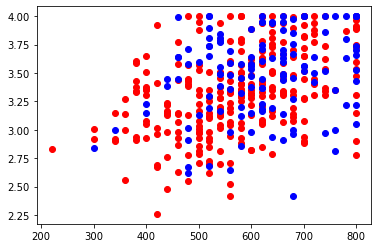

In [3]:
X = np.array(data[['gre','gpa']])
y = np.array(data[['admit']])
admitted = X[np.argwhere(y==1)]
rejected = X[np.argwhere(y==0)]
import matplotlib.pyplot as plt
#plt.scatter(rejected[0], rejected[1])

for s in rejected:
    plt.scatter(s[0][0],s[0][1],c = 'red')
for s in admitted:
    plt.scatter(s[0][0],s[0][1],c = 'blue')
    

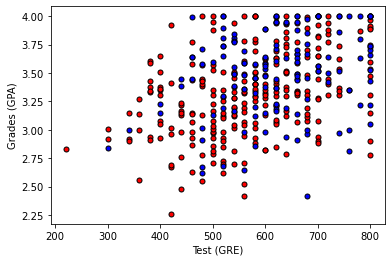

In [20]:
# Importing matplotlib
import matplotlib.pyplot as plt

# Function to help us plot
def plot_points(data):
    X = np.array(data[["gre","gpa"]])
    y = np.array(data["admit"])
    admitted = X[np.argwhere(y==1)]
    rejected = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in rejected], [s[0][1] for s in rejected], s = 25, color = 'red', edgecolor = 'k')
    plt.scatter([s[0][0] for s in admitted], [s[0][1] for s in admitted], s = 25, color = 'blue', edgecolor = 'k')
    plt.xlabel('Test (GRE)')
    plt.ylabel('Grades (GPA)')
    
# Plotting the points
plot_points(data)
plt.show()

Roughly, it looks like the students with high scores in the grades and test passed, while the ones with low scores didn't, but the data is not as nicely separable as we hoped it would. Maybe it would help to take the rank into account? Let's make 4 plots, each one for each rank.

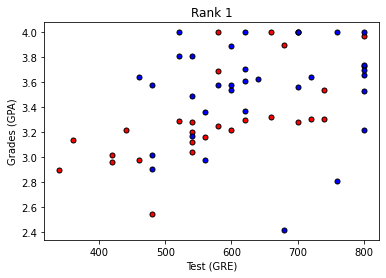

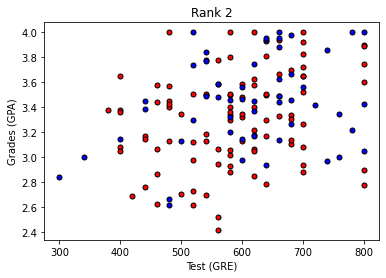

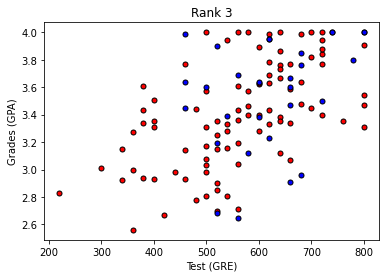

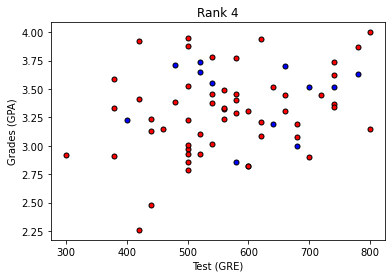

In [21]:
# Separating the ranks
data_rank1 = data[data["rank"]==1]
data_rank2 = data[data["rank"]==2]
data_rank3 = data[data["rank"]==3]
data_rank4 = data[data["rank"]==4]

# Plotting the graphs
plot_points(data_rank1)
plt.title("Rank 1")
plt.show()
plot_points(data_rank2)
plt.title("Rank 2")
plt.show()
plot_points(data_rank3)
plt.title("Rank 3")
plt.show()
plot_points(data_rank4)
plt.title("Rank 4")
plt.show()

This looks more promising, as it seems that the lower the rank, the higher the acceptance rate. Let's use the rank as one of our inputs. In order to do this, we should one-hot encode it.

## TODO: One-hot encoding the rank
Use the `get_dummies` function in numpy in order to one-hot encode the data.

In [ ]:
from sklearn.preprocessing import OneHotEncoder

In [5]:
one_hot_data=pd.get_dummies(data,columns=['rank'])
one_hot_data.head()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0,380,3.61,0,0,1,0
1,1,660,3.67,0,0,1,0
2,1,800,4.00,1,0,0,0
3,1,640,3.19,0,0,0,1
4,0,520,2.93,0,0,0,1


In [6]:
one_hot_data.columns

Index(['admit', 'gre', 'gpa', 'rank_1', 'rank_2', 'rank_3', 'rank_4'], dtype='object')

In [7]:
one_hot_data.describe()

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
count,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000,400.000000
mean,0.317500,587.700000,3.389900,0.152500,0.377500,0.302500,0.167500
std,0.466087,115.516536,0.380567,0.359955,0.485369,0.459916,0.373889
min,0.000000,220.000000,2.260000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,520.000000,3.130000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,580.000000,3.395000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,660.000000,3.670000,0.000000,1.000000,1.000000,0.000000
max,1.000000,800.000000,4.000000,1.000000,1.000000,1.000000,1.000000


## TODO: Scaling the data
The next step is to scale the data. We notice that the range for grades is 1.0-4.0, whereas the range for test scores is roughly 200-800, which is much larger. This means our data is skewed, and that makes it hard for a neural network to handle. Let's fit our two features into a range of 0-1, by dividing the grades by 4.0, and the test score by 800.

C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:ylabel='Density'>

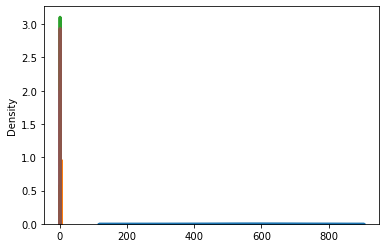

In [22]:
import seaborn as sns
sns.distplot(one_hot_data[['gre']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['gpa']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['rank_1']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['rank_2']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['rank_3']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(one_hot_data[['rank_4']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})


In [10]:
# Making a copy of our data
processed_data = one_hot_data[:]

# TODO: Scale the columns
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler() 

new=scaler.fit_transform(processed_data)
col_names=["admit" ,"gre", "gpa","rank_1","rank_2","rank_3", "rank_4"]
processed_data=pd.DataFrame(columns=col_names,data=new)

# You can also use:
#processed_data['gre'] = processed_data['gre']/800
#processed_data['gpa'] = processed_data['gpa']/4.0

# Printing the first 10 rows of our procesed data
processed_data[:10]

,admit,gre,gpa,rank_1,rank_2,rank_3,rank_4
0,0.0,0.275862,0.775862,0.0,0.0,1.0,0.0
1,1.0,0.758621,0.810345,0.0,0.0,1.0,0.0
2,1.0,1.000000,1.000000,1.0,0.0,0.0,0.0
3,1.0,0.724138,0.534483,0.0,0.0,0.0,1.0
4,0.0,0.517241,0.385057,0.0,0.0,0.0,1.0
5,1.0,0.931034,0.425287,0.0,1.0,0.0,0.0
6,1.0,0.586207,0.413793,1.0,0.0,0.0,0.0
7,0.0,0.310345,0.471264,0.0,1.0,0.0,0.0
8,1.0,0.551724,0.649425,0.0,0.0,1.0,0.0
9,0.0,0.827586,0.954023,0.0,1.0,0.0,0.0


C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot` (an axes-level function for kernel density plots).
  warnings.warn(msg, FutureWarning)
C:\Users\dell\anaconda3\lib\site-packages\seaborn\distributions.py:2557: FutureWarning: `distplot` is a deprecated function and will be removed in a future version. Please adapt your code to use either `displot` (a figure-level function with similar flexibility) or `kdeplot

<AxesSubplot:ylabel='Density'>

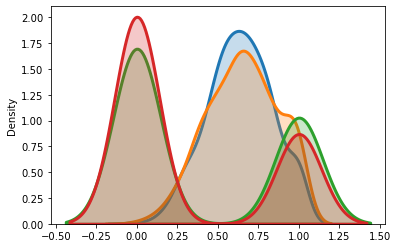

In [11]:
import seaborn as sns
sns.distplot(processed_data[['gre']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(processed_data[['gpa']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
#sns.distplot(processed_data[['rank_1']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(processed_data[['rank_2']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
sns.distplot(processed_data[['rank_3']], hist = False, kde = True,
                 kde_kws = {'shade': True, 'linewidth': 3})
#sns.distplot(processed_data[['rank_4']], hist = False, kde = True, kde_kws = {'shade': True, 'linewidth': 3})


## Splitting the data into Training and Testing

In order to test our algorithm, we'll split the data into a Training and a Testing set. The size of the testing set will be 10% of the total data.

In [12]:
sample = np.random.choice(processed_data.index,size = int(len(processed_data)*0.8))
train_data, test_data = processed_data.iloc[sample],  processed_data.drop(sample)

In [24]:
sample = np.random.choice(processed_data.index, size=int(len(processed_data)*0.8), replace=False)
train_data, test_data = processed_data.iloc[sample], processed_data.drop(sample)

print("Number of training samples is", len(train_data))
print("Number of testing samples is", len(test_data))
print(train_data[:10])
print(test_data[:10])

Number of training samples is 320
Number of testing samples is 80
     admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
138    0.0  0.689655  0.655172     0.0     1.0     0.0     0.0
206    0.0  0.896552  0.735632     1.0     0.0     0.0     0.0
63     1.0  0.793103  0.913793     0.0     0.0     1.0     0.0
134    0.0  0.586207  0.396552     0.0     1.0     0.0     0.0
66     0.0  0.896552  0.781609     0.0     0.0     0.0     1.0
373    1.0  0.689655  0.637931     1.0     0.0     0.0     0.0
346    0.0  0.655172  0.626437     0.0     1.0     0.0     0.0
115    0.0  0.689655  0.994253     0.0     0.0     1.0     0.0
207    1.0  0.724138  0.787356     1.0     0.0     0.0     0.0
175    1.0  0.689655  0.637931     0.0     1.0     0.0     0.0
    admit       gre       gpa  rank_1  rank_2  rank_3  rank_4
0     0.0  0.275862  0.775862     0.0     0.0     1.0     0.0
3     1.0  0.724138  0.534483     0.0     0.0     0.0     1.0
9     0.0  0.827586  0.954023     0.0     1.0     0.0  

## Splitting the data into features and targets (labels)
Now, as a final step before the training, we'll split the data into features (X) and targets (y).

In [14]:
features = train_data.drop('admit', axis=1)
targets = train_data['admit']
features_test = test_data.drop('admit', axis=1)
targets_test = test_data['admit']

print(features[:10])
print(targets[:10])

          gre       gpa  rank_1  rank_2  rank_3  rank_4
372  0.793103  0.091954     1.0     0.0     0.0     0.0
18   1.000000  0.856322     0.0     1.0     0.0     0.0
90   0.827586  0.902299     0.0     1.0     0.0     0.0
235  0.689655  0.454023     0.0     1.0     0.0     0.0
343  0.620690  0.459770     0.0     1.0     0.0     0.0
345  0.482759  0.442529     0.0     0.0     1.0     0.0
107  0.448276  0.500000     0.0     1.0     0.0     0.0
121  0.448276  0.235632     0.0     1.0     0.0     0.0
61   0.586207  0.609195     0.0     0.0     0.0     1.0
204  0.655172  0.936782     1.0     0.0     0.0     0.0
372    1.0
18     0.0
90     0.0
235    0.0
343    0.0
345    0.0
107    0.0
121    1.0
61     0.0
204    1.0
Name: admit, dtype: float64


In [15]:
X = processed_data.drop(['admit'], axis=1)
y = processed_data[['admit']]
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.10, random_state=42)
print('Length of X_train:',len(X_train))
print('Length of X_test:',len(X_test))
print(X_train, y_train)

Length of X_train: 360
Length of X_test: 40
          gre       gpa  rank_1  rank_2  rank_3  rank_4
381  0.551724  0.706897     0.0     1.0     0.0     0.0
55   0.896552  1.000000     0.0     0.0     1.0     0.0
76   0.586207  0.632184     0.0     0.0     1.0     0.0
25   1.000000  0.804598     1.0     0.0     0.0     0.0
82   0.482759  0.258621     0.0     1.0     0.0     0.0
..        ...       ...     ...     ...     ...     ...
71   0.137931  0.379310     0.0     0.0     0.0     1.0
106  0.827586  0.747126     1.0     0.0     0.0     0.0
270  0.724138  0.971264     0.0     1.0     0.0     0.0
348  0.310345  0.632184     0.0     1.0     0.0     0.0
102  0.275862  0.614943     0.0     0.0     0.0     1.0

[360 rows x 6 columns]      admit
381    1.0
55     1.0
76     0.0
25     1.0
82     0.0
..     ...
71     0.0
106    1.0
270    1.0
348    0.0
102    0.0

[360 rows x 1 columns]


## Training the 2-layer Neural Network
The following function trains the 2-layer neural network. First, we'll write some helper functions.

In [16]:
# Activation (sigmoid) function
def sigmoid(x):
    return 1 / (1 + np.exp(-x))
def sigmoid_prime(x):
    return sigmoid(x) * (1-sigmoid(x))
def error_formula(y, output):
    return - y*np.log(output) - (1 - y) * np.log(1-output)

# TODO: Backpropagate the error
Now it's your turn to shine. Write the error term. Remember that this is given by the equation $$ -(y-\hat{y}) \sigma'(x) $$

In [17]:
def error_term_formula(y, output):
    return -(y-output) * output * (1 - output)

In [18]:
# Neural Network hyperparameters
epochs = 2500
learnrate = 1.0

# Training function
def train_nn(features, targets, epochs, learnrate):
    
    # Use to same seed to make debugging easier
    np.random.seed(42)

    n_records, n_features = features.shape
    last_loss = None

    # Initialize weights
    weights = np.random.normal(scale=1 / n_features**.5, size=n_features)

    for e in range(epochs):
        del_w = np.zeros(weights.shape)
        for x, y in zip(features.values, targets):
            # Loop through all records, x is the input, y is the target

            # Activation of the output unit
            #   Notice we multiply the inputs and the weights here 
            #   rather than storing h as a separate variable 
            output = sigmoid(np.dot(x, weights))

            # The error, the target minus the network output
            error = error_formula(y, output)

            # The error term
            #   Notice we calulate f'(h) here instead of defining a separate
            #   sigmoid_prime function. This just makes it faster because we
            #   can re-use the result of the sigmoid function stored in
            #   the output variable
            error_term = error_term_formula(y, output)

            # The gradient descent step, the error times the gradient times the inputs
            del_w += error_term * x

        # Update the weights here. The learning rate times the 
        # change in weights, divided by the number of records to average
        weights = weights - learnrate * del_w / n_records

        # Printing out the mean square error on the training set
        if e % (epochs / 10) == 0:
            out = sigmoid(np.dot(features, weights))
            loss = np.mean((out - targets) ** 2)
            print("Epoch:", e)
            if last_loss and last_loss < loss:
                print("Train loss: ", loss, "  WARNING - Loss Increasing")
            else:
                print("Train loss: ", loss)
            last_loss = loss
            print("=========")
    print("Finished training!")
    return weights
    
weights = train_nn(features, targets, epochs, learnrate)

Epoch: 0
Train loss:  0.2641838201916057
Epoch: 250
Train loss:  0.2038166828515163
Epoch: 500
Train loss:  0.2005035523611809
Epoch: 750
Train loss:  0.19819538888188953
Epoch: 1000
Train loss:  0.19650389816595712
Epoch: 1250
Train loss:  0.1952554572244515
Epoch: 1500
Train loss:  0.19432619913123067
Epoch: 1750
Train loss:  0.1936280041912193
Epoch: 2000
Train loss:  0.193098463280844
Epoch: 2250
Train loss:  0.19269321944587176
Finished training!


## Calculating the Accuracy on the Test Data

In [145]:
weights

array([ 0.59172822,  1.10047973, -0.90418621, -1.74729325, -2.2435158 ,
       -2.48941997])

In [158]:
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out > 0.5
predictions

array([False,  True, False, False, False, False, False, False, False,
        True, False, False, False,  True,  True,  True, False, False,
       False, False, False, False, False, False, False,  True, False,
       False, False, False, False, False, False,  True, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False, False, False, False, False, False,
       False, False, False, False,  True, False,  True, False, False,
       False, False, False, False,  True, False, False, False, False,
       False, False, False, False, False, False, False, False])

In [156]:
# Calculate accuracy on test data
tes_out = sigmoid(np.dot(features_test, weights))
predictions = tes_out >= 0.5
accuracy = np.mean(predictions == targets_test)
print("Prediction accuracy: {:.3f}".format(accuracy))

Prediction accuracy: 0.637
